In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
url='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
df=pd.read_csv(url)
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


Q1

In [3]:
A = [1,2,3,4,5,6]
B =[13, 21, 34]

In [4]:
A.append(B)
print(A)

[1, 2, 3, 4, 5, 6, [13, 21, 34]]


In [5]:
A.extend(B)
print(A)

[1, 2, 3, 4, 5, 6, [13, 21, 34], 13, 21, 34]


Q2

In [6]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Q3

In [7]:
df.groupby(['fuel_type_code_pudl']).mean()['fuel_cost_per_unit_burned'].sort_values()

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

Q4

In [8]:
np.round(df['fuel_mmbtu_per_unit'].std(),2)

10.6

In [9]:
np.round(np.quantile(df['fuel_mmbtu_per_unit'],0.75),2)

17.01

Q5

In [10]:
np.round(df['fuel_qty_burned'].skew(),2)

15.85

In [11]:
np.round(df['fuel_qty_burned'].kurtosis(),2)

651.37

Q6

In [12]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [13]:
df.shape

(29523, 11)

In [14]:
np.round(((180/29523)*100),3)

0.61

Q7

In [15]:
categ=(df.dtypes=='object')
object_col=list(categ[categ].index)
print('categorical variable')
print(object_col)

categorical variable
['record_id', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']


Q8

In [16]:
df.corr()['fuel_cost_per_unit_burned'].sort_values()

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

Q9

In [17]:
coal_1=df[df['fuel_type_code_pudl']=='coal']

In [18]:
coal_1.groupby(['report_year']).sum()['fuel_cost_per_unit_burned']

report_year
1994     14984.572
1995     14571.785
1996     12694.803
1997     43742.178
1998     11902.597
1999     16303.468
2000    100428.831
2001     15109.012
2002      9171.164
2003     30954.110
2004      9632.063
2005     11107.182
2006     12402.684
2007     12965.171
2008     14331.348
2009     45554.858
2010     88627.745
2011     17001.015
2012     17546.097
2013     17629.860
2014     15412.197
2015     13338.235
2016     11100.925
2017     10254.284
2018      9488.197
Name: fuel_cost_per_unit_burned, dtype: float64

In [19]:
np.round(((11902.597-14984.572)/14984.572)*100)

-21.0

Q10

In [20]:
df.groupby(['report_year']).mean()['fuel_cost_per_unit_delivered'].sort_values(ascending=False)

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
2015      326.535511
1998      287.154420
2014      192.737183
2013      172.307591
2004      139.524275
2016      103.901761
2010       91.862105
1994       63.636060
2012       60.994502
2001       60.050396
2011       59.774667
2008       58.588197
2003       55.663493
2002       47.594361
2017       46.196861
2007       43.325023
2005       41.438184
2006       38.657484
1995       32.735269
1999       25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64

Basic Data Exploration

In [21]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [22]:
df.tail()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


In [23]:
df.shape

(29523, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [25]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [26]:
df_1=df.dropna(how='any')
df_1.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [27]:
df_1.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29343.000000,29343.000000,2.934300e+04,29343.000000,29343.000000,2.934300e+04,29343.000000
mean,118.507037,2005.819105,2.609171e+06,8.477481,209.756592,9.230343e+02,18.543975
std,74.241226,7.019855,8.798699e+06,10.537478,2863.194789,6.898652e+04,2097.367750
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.375050e+04,1.024000,5.230000,3.793000e+00,1.950000
50%,122.000000,2006.000000,2.524640e+05,5.763072,26.039000,1.749000e+01,4.140000
75%,176.000000,2012.000000,1.424218e+06,17.000000,47.172000,4.220850e+01,7.752000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


Data Visualization

In [28]:
import seaborn as sns


In [29]:
df_2= df.sample(n=50, random_state=4)

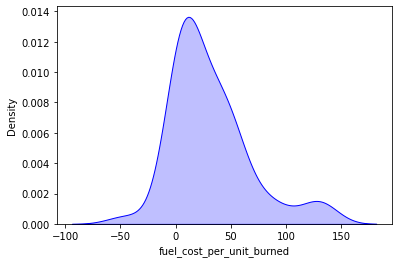

In [30]:
sns.kdeplot(df_2['fuel_cost_per_unit_burned'], shade=True, color="b")

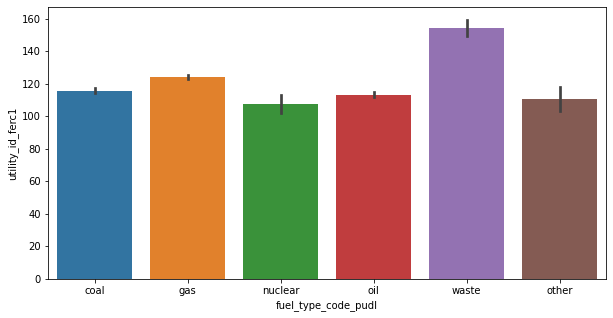

In [31]:
plt.subplots(figsize=(10,5))
sns.barplot(x='fuel_type_code_pudl', y="utility_id_ferc1",data=df)

In [32]:
 df_1_ = pd.DataFrame(['fuel_cost_per_unit_burned'])
corr = df_1.corr()
corr.style.background_gradient(cmap='coolwarm')

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093267,-0.058025,-0.069000,-0.037868,-0.016434,0.005884
report_year,0.093267,1.000000,0.015894,-0.110421,0.013495,-0.014123,0.010304
fuel_qty_burned,-0.058025,0.015894,1.000000,-0.082971,-0.019147,-0.003671,-0.001879
fuel_mmbtu_per_unit,-0.069000,-0.110421,-0.082971,1.000000,-0.010065,-0.009104,-0.005595
fuel_cost_per_unit_burned,-0.037868,0.013495,-0.019147,-0.010065,1.000000,0.011002,-0.000411
fuel_cost_per_unit_delivered,-0.016434,-0.014123,-0.003671,-0.009104,0.011002,1.000000,-0.000104
fuel_cost_per_mmbtu,0.005884,0.010304,-0.001879,-0.005595,-0.000411,-0.000104,1.000000
